In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from random import gauss, seed
from math import sqrt, exp

In [ ]:
# Stock price simulator

# mu = 0.001
# sigma = 0.01
# start_price = 100

# np.random.seed(0)
# returns = np.random.normal(loc=mu, scale=sigma, size=252)
# price = start_price*(1+returns).cumprod()


def generate_price(s0, mu, sigma):
    
    np.random.seed(1234)
    returns = np.random.normal(loc=mu, scale=sigma, size=30)
    price = s0*(1+returns).cumprod()
   
    return price


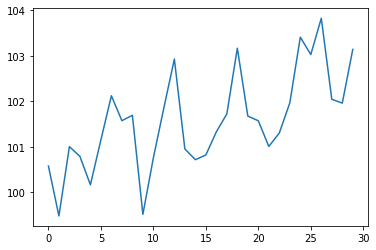

In [ ]:
# plt.plot(price)
price = generate_price(100, 0.001, 0.01)
plt.plot(price)

In [ ]:
# size = 252  
df = pd.DataFrame(columns=['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
df['A'] = generate_price(100, 0.001, 0.01) 
df['B'] = generate_price(150, 0.001, 0.01) 
df['C'] = generate_price(50, 0.001, 0.01) 
df['D'] = generate_price(200, 0.001, 0.01) 
df['E'] = generate_price(120, 0.001, 0.01) 
df['F'] = generate_price(90, 0.001, 0.01) 
df['G'] = generate_price(60, 0.001, 0.01) 
df['H'] = generate_price(40, 0.001, 0.01) 

In [ ]:
df.head()

,A,B,C,D,E,F,G,H
0,100.571435,150.857153,50.285718,201.142870,120.685722,90.514292,60.342861,40.228574
1,99.474225,149.211338,49.737113,198.948451,119.369070,89.526803,59.684535,39.789690
2,100.998874,151.498310,50.499437,201.997747,121.198648,90.898986,60.599324,40.399549
3,100.784098,151.176146,50.392049,201.568195,120.940917,90.705688,60.470459,40.313639
4,100.158643,150.237964,50.079321,200.317286,120.190371,90.142779,60.095186,40.063457


In [ ]:
print(df.dtypes)

A    float64
B    float64
C    float64
D    float64
E    float64
F    float64
G    float64
H    float64
dtype: object


In [ ]:
price_close = df.values # convert to numpy array

In [ ]:
mst = ['A', 'B', 'C', 'D']
portfolio_mst = [name for name in mst] # [name for name in mst.index.values]

In [ ]:
print(portfolio_mst)

['A', 'B', 'C', 'D']


In [ ]:
pmfg = ['E', 'F', 'G', 'H']

portfolio_pmfg = [name for name in pmfg]

In [ ]:
# Portfolio performance for MST
# Assume you invest R1 000 000 on the portfolio on 2021-07-16 and keep the portfolio for 30days

amount = 1000000
portfolio_price = pd.DataFrame()
for c in portfolio_mst:
      portfolio_price[c] = df[c]
        
portfolio_unit = portfolio_price.sum(axis=1)[0]
share = amount/portfolio_unit
mst_portfolio_value = portfolio_price.sum(axis=1)*share

In [ ]:
portfolio_price.head()

,A,B,C,D
0,100.571435,150.857153,50.285718,201.142870
1,99.474225,149.211338,49.737113,198.948451
2,100.998874,151.498310,50.499437,201.997747
3,100.784098,151.176146,50.392049,201.568195
4,100.158643,150.237964,50.079321,200.317286


In [ ]:
mst_portfolio_value.head()

0    1.000000e+06
1    9.890902e+05
2    1.004250e+06
3    1.002115e+06
4    9.958955e+05
dtype: float64

In [ ]:
# Portfolio performance for PMFG
# Assume you invest R1 000 000 on the portfolio from 16 january
 2020 to 16 july 2021


amount = 1000000
pportfolio_price = pd.DataFrame()
for c in portfolio_pmfg:
      pportfolio_price[c] = df[c]
        
pportfolio_unit = pportfolio_price.sum(axis=1)[0]
sshare = amount/pportfolio_unit
pmfg_portfolio_value = pportfolio_price.sum(axis=1)*share

In [ ]:
pportfolio_price.head()

,E,F,G,H
0,120.685722,90.514292,60.342861,40.228574
1,119.369070,89.526803,59.684535,39.789690
2,121.198648,90.898986,60.599324,40.399549
3,120.940917,90.705688,60.470459,40.313639
4,120.190371,90.142779,60.095186,40.063457


In [ ]:
pmfg_portfolio_value.head()

0    620000.000000
1    613235.950693
2    622635.060842
3    621311.015579
4    617455.229418
dtype: float64

In [ ]:
# # Assume invest R1 000 000 on the portfolio from 16 january 2020 to 16 july 2021
# mst_portfolio_value = portfolio_value(1000000, portfolio_mst)


In [ ]:
mst_portfolio_value.head()

0    1.000000e+06
1    9.890902e+05
2    1.004250e+06
3    1.002115e+06
4    9.958955e+05
dtype: float64

In [ ]:
# # Assume invest R1 000 000 on the portfolio 
# pmfg_portfolio_value = portfolio_value(1000000, portfolio_pmfg)

In [ ]:
pmfg_portfolio_value.head()

0    620000.000000
1    613235.950693
2    622635.060842
3    621311.015579
4    617455.229418
dtype: float64

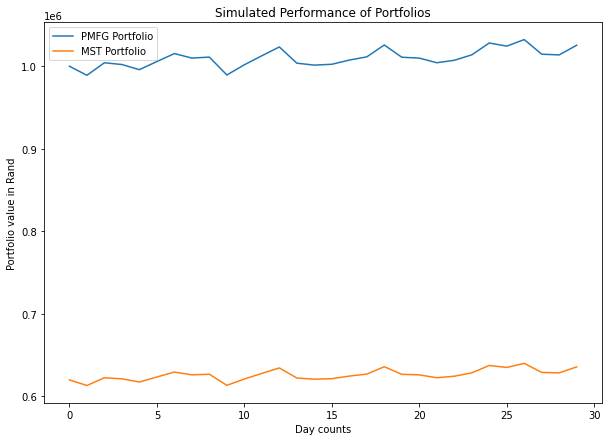

In [ ]:
x = range(30)
fig, ax = plt.subplots(figsize = (10,7))
line1, = ax.plot(x, mst_portfolio_value, label='PMFG Portfolio')
line2, = ax.plot(x, pmfg_portfolio_value, label = 'MST Portfolio' )
ax.set_title('Simulated Performance of Portfolios')
ax.legend(loc='upper left')
plt.xlabel('Day counts')
# Set the y axis label of the current axis.
plt.ylabel('Portfolio value in Rand')
plt.savefig('performance of portfolio.png')
plt.show()

In [ ]:
plt.xlabel('x - axis')
# Set the y axis label of the current axis.
plt.ylabel('y - axis')